In [1]:
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import numpy as np
import os

In [116]:
inputs = keras.Input(shape=(28, 28, 1))

In [117]:
augmentation = keras.Sequential([
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
])
x = augmentation(inputs)

In [118]:
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

In [119]:
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)

In [120]:
x = layers.MaxPooling2D(pool_size=2)(x)

In [94]:
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)

In [95]:
x = layers.Flatten()(x)

In [96]:
outputs = layers.Dense(10, activation="softmax")(x)

In [97]:
model = keras.Model(inputs=inputs, outputs=outputs)

In [128]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [129]:
train_images = train_images.reshape((60000, 28, 28, 1)).astype("float32") / 255

In [100]:
test_images = test_images.reshape((10000, 28, 28, 1)).astype("float32") / 255

In [101]:
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [102]:
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 20s 21ms/step - loss: 0.2706 - accuracy: 0.9143
Epoch 2/5
938/938 [==============================] - 19s 21ms/step - loss: 0.0920 - accuracy: 0.9717
Epoch 3/5
938/938 [==============================] - 21s 22ms/step - loss: 0.0679 - accuracy: 0.9785
Epoch 4/5
938/938 [==============================] - 21s 22ms/step - loss: 0.0592 - accuracy: 0.9818
Epoch 5/5
938/938 [==============================] - 21s 22ms/step - loss: 0.0525 - accuracy: 0.9839


In [130]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 7.9495 - accuracy: 0.9870


[7.949492931365967, 0.9869999885559082]

In [123]:
image = tf.keras.preprocessing.image.load_img("img.png", color_mode="grayscale", target_size=(28, 28), interpolation="bilinear")

In [124]:
image = np.array(image)

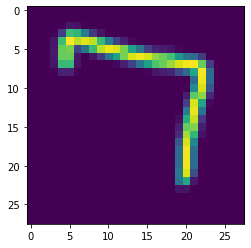

In [76]:
plt.imshow(image)

In [125]:
image = image.reshape([1, 28, 28])

In [66]:
model.predict(image)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [2]:
model_version = '0002'

In [3]:
model_name = 'digits'

In [4]:
model_path = os.path.join(model_name, model_version)

In [87]:
model.save(model_path)

2021-12-18 11:34:20.669616: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


KeyError: "Failed to add concrete function 'b'__inference_model_layer_call_fn_23446'' to object-based SavedModel as it captures tensor <tf.Tensor: shape=(), dtype=resource, value=<Resource Tensor>> which is unsupported or not reachable from root. One reason could be that a stateful object or a variable that the function depends on is not assigned to an attribute of the serialized trackable object (see SaveTest.test_captures_unreachable_variable)."

In [5]:
cnn = keras.models.load_model(model_path)

2021-12-19 12:31:45.664570: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
cnn.predict(train_images[0], batch_size=None).argmax()

NameError: name 'train_images' is not defined

In [8]:
pwd

'/Users/aidanfarnum/Documents/digrec'

In [127]:
cnn.predict(image).argmax()

7

In [132]:
train_images[0].shape

(28, 28, 1)

In [9]:
cnn.save('/Users/aidanfarnum/Documents/diglet/orig_cnn/0001')

2021-12-19 12:33:43.444632: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /Users/aidanfarnum/Documents/diglet/orig_cnn/0001/assets
